In [1]:
import numpy as np
import seaborn as sns
import math

In [2]:
x = 2000
y = 3200

finesse = 150
width = math.ceil(150/finesse)

m = math.floor(y/finesse)
n = math.floor(x/finesse)

top = (m*finesse)/2

maze = np.ones(shape = (m,n))

cmap = "GnBu"

In [25]:
def print_path(maze,path,start,end):
    final_maze = maze.copy()
    
    for p in path:
        final_maze[p[0]][p[1]] = 0.5
        
    final_maze[start[0]][start[1]] = 0.8
    final_maze[end[0]][end[1]] = 0.6
    
    sns.heatmap(final_maze, linewidths = 0.01, cmap = cmap)

In [4]:
def get_neighbors():
    neighbors = []
    
    for x in range(-width,width+1):
        for y in range(-width,width+1):
            neighbors.append((x,y))
    
    neighbors.remove((0,0))
    return neighbors

In [5]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

In [27]:
def astar(maze, start, end):
    start_node = Node(None, position = start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, position = end)
    end_node.g = end_node.h = end_node.f = 0
    
    open_list = []
    closed_list = []
    
    open_list.append(start_node)
    
    while len(open_list) > 0:
        
        current_node = open_list[0]
        current_index = 0
        
        #Find the best node
        for index,item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
                
        #Pop current node and add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)
        
        #Finished
        if current_node == end_node:
            path = []
            current = current_node
            
            while current is not None:
                path.append(current.position)
                current = current.parent
                
            return path[::-1] #Return reversed path
        
        #Generate children
        children = []
        
        for new_position in [(0,-1),(0,1),(1,0),(-1,0),(-1,1),(-1,-1),(1,-1),(1,1)]:
            
            #Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[0]) - 1) or node_position[1] < 0:
                continue
                
            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 1:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)
            

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = heuristic(child,end_node)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)
                

In [7]:
def heuristic(current, end):
    h = ((current.position[0] - end.position[0]) ** 2) + ((current.position[1] - end.position[1]) ** 2)
    #h = np.abs(current.position[0] - end.position[0]) + np.abs(current.position[1] - end.position[1])
    return h

In [8]:
def map_position(position):
    j = math.floor(position[0]/finesse)
    i = math.floor((-position[1]+top)/finesse)
    
    return i,j

In [9]:
def map_inverse(matrix_pos):
    
    half = finesse/2
    
    x = (matrix_pos[1]*finesse) + half
    y = top - (matrix_pos[0]*finesse) - half
    
    return x,y

In [10]:
def is_blocked(obstacle, matrix_pos):
    x,y = map_inverse(matrix_pos)
    
    distance = np.sqrt(np.power(x - obstacle[0],2) + np.power(y - obstacle[1],2))
    
    return 1 if distance > 150 else 0 

In [11]:
def check_neighbors(obstacle):
    global maze
    center_pos = map_position(obstacle)
    
    maze[center_pos[0]][center_pos[1]] = 0.3
    print(center_pos)
    
    for new_position in get_neighbors():
        #Get node position
        pos = (center_pos[0] + new_position[0], center_pos[1] + new_position[1])

        if pos[0] > (len(maze) - 1) or pos[0] < 0 or pos[1] > (len(maze[0]) - 1) or pos[1] < 0:
            print('continue')
            continue
            
        res = is_blocked(obstacle, pos) 
        
        print('Position {} is {}'.format(pos,res))
            
        maze[pos[0]][pos[1]] = res    
        

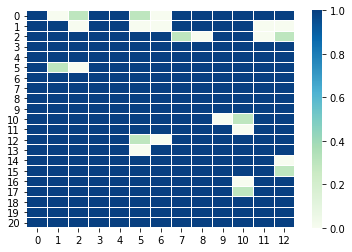

In [17]:
sns.heatmap(maze, linewidths = 0.01, vmin =0, vmax = 1, cmap=cmap)

In [15]:
obstacles = [(1180.71,1206.32),
            (272,745),
            (1533.26,-33.17),
            (848,-311),
            (898.45,1471.614),
            (1571.51,-1008.25),
            (1900,-736.86),
            (1836.01,1271),
            (315.69,1473.4)]

In [16]:
for index,obstacle in enumerate(obstacles):
    print('\nObstacle {}'.format(index))
    check_neighbors(obstacle)


Obstacle 0
(2, 7)
Position (1, 6) is 1
Position (1, 7) is 1
Position (1, 8) is 1
Position (2, 6) is 1
Position (2, 8) is 0
Position (3, 6) is 1
Position (3, 7) is 1
Position (3, 8) is 1

Obstacle 1
(5, 1)
Position (4, 0) is 1
Position (4, 1) is 1
Position (4, 2) is 1
Position (5, 0) is 1
Position (5, 2) is 0
Position (6, 0) is 1
Position (6, 1) is 1
Position (6, 2) is 1

Obstacle 2
(10, 10)
Position (9, 9) is 1
Position (9, 10) is 1
Position (9, 11) is 1
Position (10, 9) is 0
Position (10, 11) is 1
Position (11, 9) is 1
Position (11, 10) is 0
Position (11, 11) is 1

Obstacle 3
(12, 5)
Position (11, 4) is 1
Position (11, 5) is 1
Position (11, 6) is 1
Position (12, 4) is 1
Position (12, 6) is 0
Position (13, 4) is 1
Position (13, 5) is 0
Position (13, 6) is 1

Obstacle 4
(0, 5)
continue
continue
continue
Position (0, 4) is 1
Position (0, 6) is 0
Position (1, 4) is 1
Position (1, 5) is 0
Position (1, 6) is 0

Obstacle 5
(17, 10)
Position (16, 9) is 1
Position (16, 10) is 0
Position (16, 

In [18]:
end = (1421.43,-1534.76)

In [19]:
start = (1048.18,1337.08)

In [20]:
start_pos = map_position(start)

In [21]:
end_pos = map_position(end)

In [28]:
path = astar(maze, start_pos, end_pos)

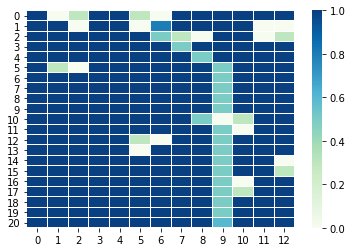

In [29]:
print_path(maze,path,start_pos,end_pos)